### Setup
##### Importing the necessary libraries

In [77]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#### Read the data

In [78]:
data = pd.read_csv('movies.csv')

#### Looking at the data

In [79]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data Cleaning
#### Checking for missing data

In [80]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_date = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage.round(2)})
missing_date.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
budget,2171,28.31
gross,189,2.46
rating,77,1.00
company,17,0.22
runtime,4,0.05
score,3,0.04
votes,3,0.04
writer,3,0.04
country,3,0.04
released,2,0.03


#### Checking for duplicate and dropping

In [81]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
if duplicates > 0:
    data = data.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


#### Removing the redundant column

In [82]:
# Extract month from released column
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = data['released'].str.split().str[0]
data['month'] = data['month'].where(data['month'].isin(months), other=None)

data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [83]:
# Removing the released column as it is no longer needed
data = data.drop('released', axis=1)

#### Standardizing rating categories

In [84]:
data['rating'].value_counts()

rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

In [85]:
# Combining 'Unrated' and 'Not Rated' into a single category
data['rating'] = data['rating'].replace({'Unrated': 'Not Rated'})

data["rating"].value_counts()

rating
R            3697
PG-13        2112
PG           1252
Not Rated     335
G             153
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

### Handling missing values

#### Removing rows for low-missingness features

In [86]:
# Handle missing values with <5% missing values by dropping rows
drop_cols = ['gross', 'rating', 'company', 'runtime', 'score', 'votes', 'writer',
             'country', 'country', 'star']
df_clean = data.dropna(subset=drop_cols)

#### Handling moderate missing values with imputation

In [87]:
# Handle missing values with <50% missing values by imputing
from sklearn.impute import SimpleImputer

impute_cols = ['budget']
budget_imputer = SimpleImputer(strategy='median')

df_clean = df_clean.copy()
df_clean[impute_cols] = budget_imputer.fit_transform(df_clean[impute_cols])

In [88]:
# Reset index 
df_clean.reset_index(drop=True, inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7412 entries, 0 to 7411
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7412 non-null   object 
 1   rating    7412 non-null   object 
 2   genre     7412 non-null   object 
 3   year      7412 non-null   int64  
 4   score     7412 non-null   float64
 5   votes     7412 non-null   float64
 6   director  7412 non-null   object 
 7   writer    7412 non-null   object 
 8   star      7412 non-null   object 
 9   country   7412 non-null   object 
 10  budget    7412 non-null   float64
 11  gross     7412 non-null   float64
 12  company   7412 non-null   object 
 13  runtime   7412 non-null   float64
 14  month     7405 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 868.7+ KB


#### Data type optimization

In [89]:
# Data types of each column
data.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
month        object
dtype: object

In [90]:
# Change data type of columns
df_clean['votes'] = df_clean['votes'].astype('int64')
df_clean['budget'] = df_clean['budget'].astype('int64')
df_clean['gross'] = df_clean['gross'].astype('int64')
df_clean['runtime'] = df_clean['runtime'].astype('int64')

df_clean

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,February
7408,The Eight Hundred,Not Rated,Action,2020,6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,August
7409,The Quarry,R,Crime,2020,5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,21800000,3661,Prowess Pictures,98,April
7410,Tulsa,PG-13,Comedy,2020,5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,21800000,413378,Pryor Entertainment,120,June


### Data Exploration

In [91]:
# Let's see the correlation between numerical columns with pear
correlation_matrix = df_clean.corr(numeric_only=True)
correlation_matrix


,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.290399,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.059271,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.455229,0.631110,0.309945
budget,0.290399,0.059271,0.455229,1.000000,0.744394,0.273522
gross,0.258826,0.188071,0.631110,0.744394,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.273522,0.245117,1.000000


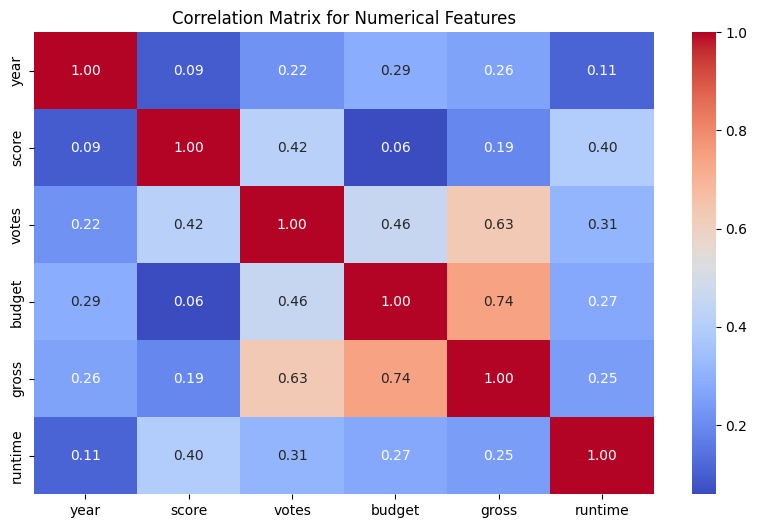

In [92]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

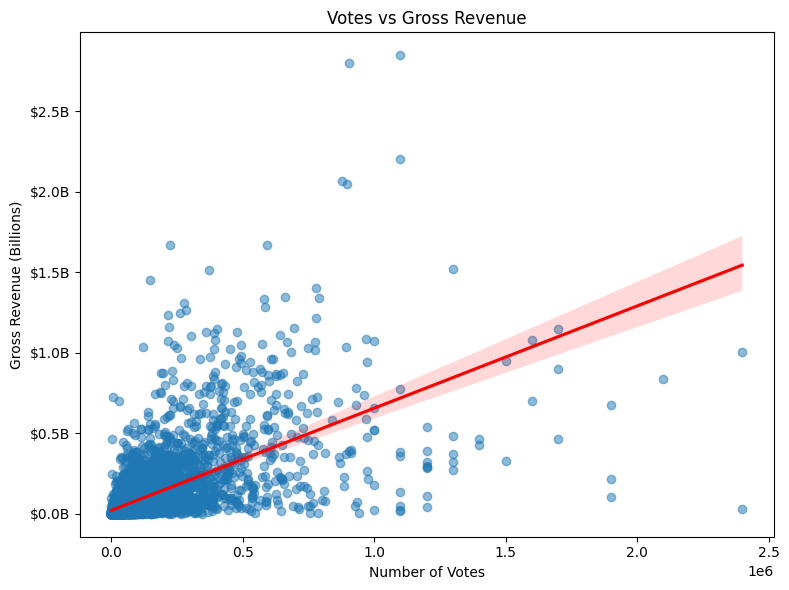

In [98]:
# Visualize the regression line between votes and gross revenue
plt.figure(figsize=(8, 6))
sns.regplot(x='votes', y='gross', data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Votes vs Gross Revenue')
plt.xlabel('Number of Votes')
plt.ylabel('Gross Revenue (Billions)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

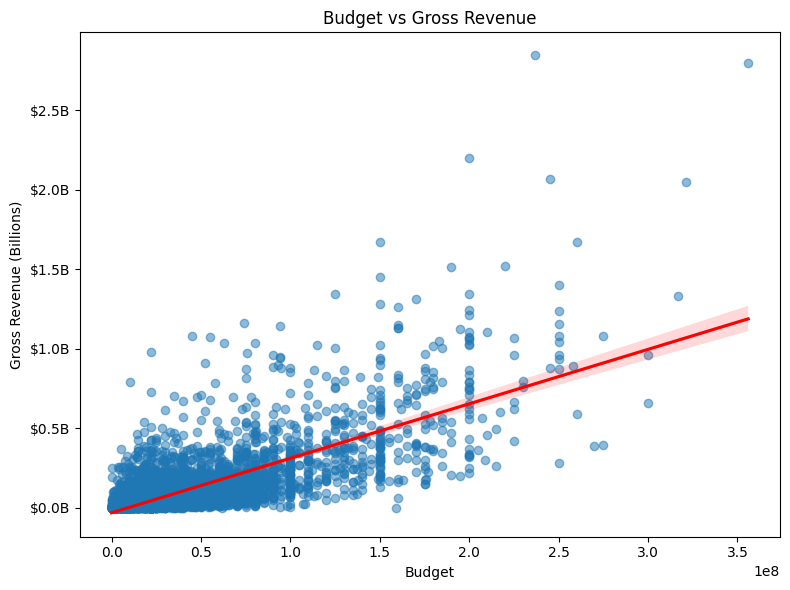

In [99]:
# Visualize the regression line between budget and gross revenue
plt.figure(figsize=(8, 6))
sns.regplot(x='budget', y='gross', data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue (Billions)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

**Conclusion:** The factors contributing to a film success are votes and budget, as they have the highest correlation.

### Data Exploration Cont'd

While we have determined the factors contributing the most to a movie success. There are still few other factors we can explore.
- Which month generates the highest revenue for film release?
- What is the ideal runtime for a movie?
- Which genres generates the highest total revenue and which have the best average perfomance per movie?

#### Which month generates the highest revenue for film release?
By grouping the gross revenue by month, we can answer this question.

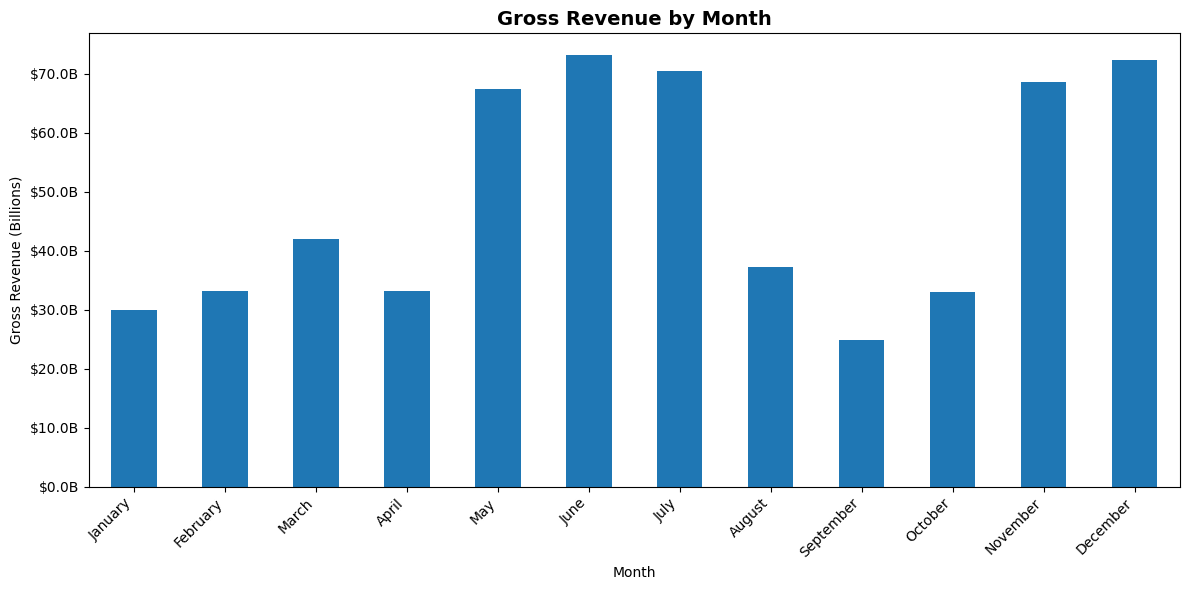

In [95]:
# Visualize the gross revenue by month
monthly_gross = df_clean.groupby('month')['gross'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

ax = monthly_gross.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Gross Revenue (Billions)')
plt.title('Gross Revenue by Month', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

plt.tight_layout()
plt.show()

**Conclusion:** Movie revenue shows clear patterns. Late year months (November - December) and mid year months (May - July) deliver the strongest performance, while early year months (January - February) are consistently weaker. 

#### What is the ideal runtime for a movie?

C:\Users\krist\AppData\Local\Temp\ipykernel_12920\4177717711.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_gross = df_clean.groupby('runtime_bin')['gross'].mean()


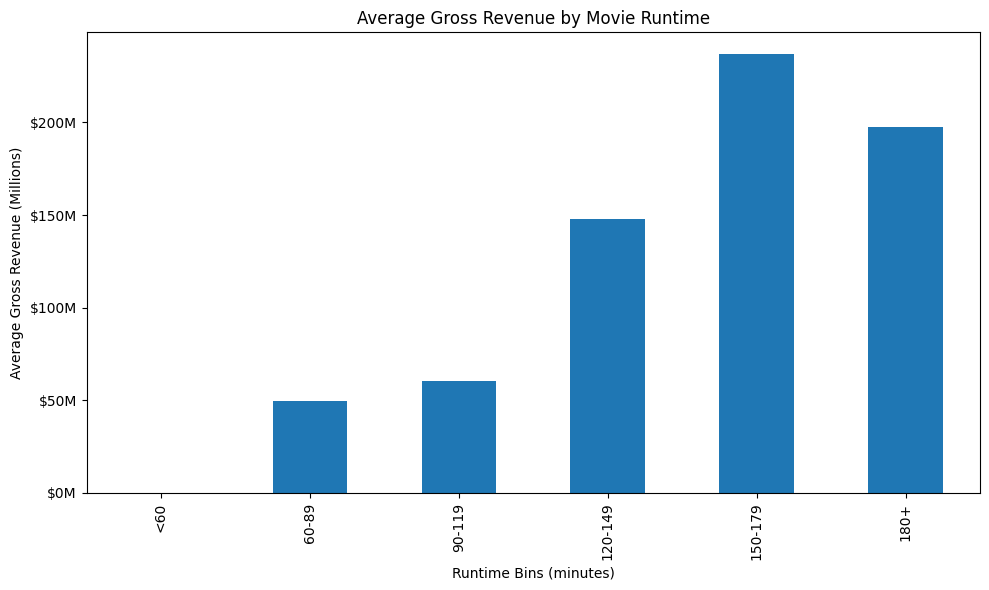

In [96]:
# Visualize the average gross revenue by runtime bins 
runtime_bins = [0, 60, 90, 120, 150, 180, 240]
runtime_labels = ['<60', '60-89', '90-119', '120-149', '150-179', '180+']
df_clean['runtime_bin'] = pd.cut(df_clean['runtime'], bins=runtime_bins, labels=runtime_labels, right=False)
runtime_gross = df_clean.groupby('runtime_bin')['gross'].mean()  
ax = runtime_gross.plot(kind='bar', figsize=(10, 6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
plt.xlabel('Runtime Bins (minutes)')
plt.ylabel('Average Gross Revenue (Millions)')
plt.title('Average Gross Revenue by Movie Runtime')
plt.tight_layout()
plt.show()

**Conclusion:** The ideal runtime seems to be between 150 and 179 minutes.

#### Which genres generates the highest total revenue and which have the best average perfomance per movie? 

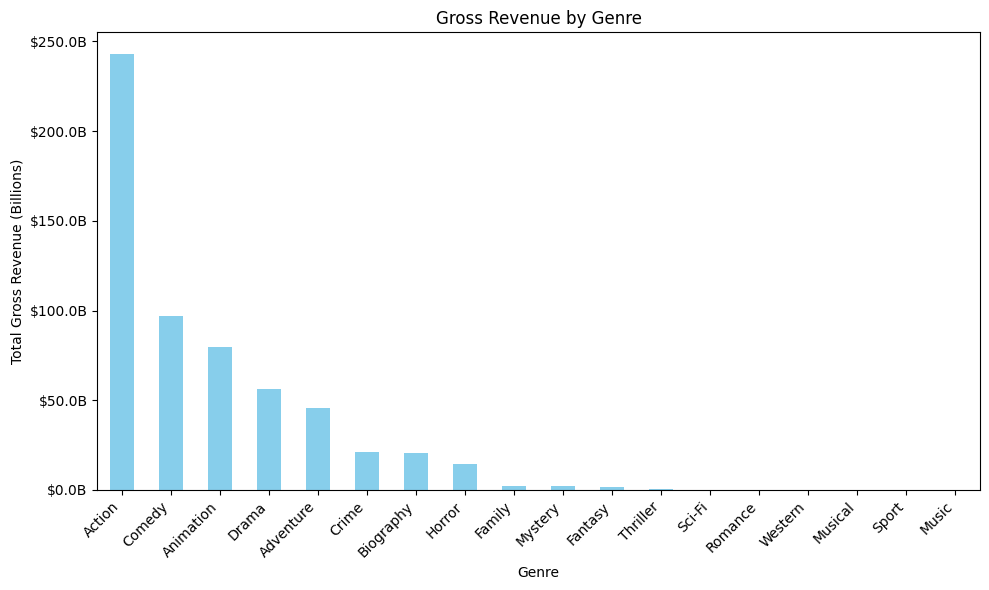

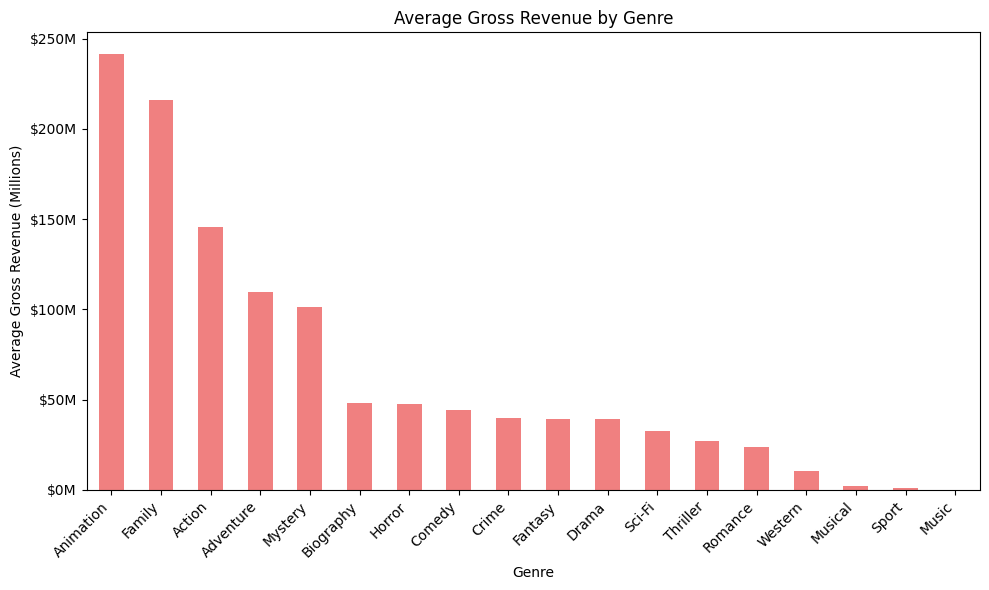

In [107]:
# Visualize the total gross revenue and average gross revenue by genre
genre_gross = df_clean.groupby('genre')['gross'].sum().sort_values(ascending=False)
genre_avg_gross = df_clean.groupby('genre')['gross'].mean().sort_values(ascending=False)    

genre_gross.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue (Billions)')
plt.title('Gross Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

# Create a second plot for average gross revenue by genre
genre_avg_gross.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Average Gross Revenue (Millions)')
plt.title('Average Gross Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
plt.tight_layout()
plt.show()

**Conclusion:** The Action genre had the highest level of success across all movies, whereas the Animation and Family had the highest average success rate.